# Spatial Filtering
In spatial filtering, the value of a pixel is replaced by a function of the value of the pixel and its neighbours.
Spatial filters can be linear or non-linear.

## Linear Spatial Filtering
Here, we compute the sum-of-product between a kernel $w$ and the image. The kernel size dictates the neighborhood considered. For a kernel of size $m\times n$, both $m$ and $n$ are assumed odd with $m=2a + 1$ and $n=2b+1$. For an $M\times N$ image with an $m\times n$ kernel we obtain the filtered image $g(x,y)$ as

\begin{equation}
g(x,y) = \sum_{s=-a}^a\sum_{t=-b}^b w(s,t)f(x+s,y+t)
\end{equation}

This is also known as spatial correlation

## A. Spatial Correlation and Convolution
In spatial convolution, the correlation kernel is rotated by $180^{\circ}$. This yields

\begin{equation}
g(x,y) = \sum_{s=-a}^a\sum_{t=-b}^b w(s,t)f(x-s,y-t)
\end{equation}

### Zero padding
For a kernel of size $m\times n$, we pad the image with a minumum of $(m-1)/2$ rows of $0's$ at the top and bottom and $(n-1)/2$ columns of $0's$ on the left and right.

### Examples: Figures 3.29 & 3.30 (In the course textbook)
In 1D, the correlation equation becomes
\begin{equation}
g(x) = \sum_{s=-a}^a w(s)f(x+s)
\end{equation}
Correlation with the discrete unit impulse rotates the image by $180^{\circ}$.

Let's look at how to reproduce the examples in figures 3.29 and 3.30 in the Gonzalez & Woods textbook. When `mode` parameter in the `correlate` and `convolve` functions is switched between 'full', and 'same', the output is exactly the same as that described as 'full correlation/convolution result' and 'correlation/convolution result' in figures 3.29 and 3.30 of the textbook.

In [1]:
# FIGURE 3.29

import numpy as np
from scipy.signal import correlate, convolve

f = np.array([0, 0, 0, 1, 0, 0, 0])
w = np.array([1, 2, 4, 2, 8])

full = correlate(f, w, mode='full')
same = correlate(f, w, mode='same')

print("Correlation")
print(f"Full correlation result: {full}")
print(f"Same correlation result: {same}")

full = convolve(f, w, mode='full')
same = convolve(f, w, mode='same')

print("\nConvolution")
print(f"Full convolution result: {full}")
print(f"Same convolution result: {same}")

Correlation
Full correlation result: [0 0 0 8 2 4 2 1 0 0 0]
Same correlation result: [0 8 2 4 2 1 0]

Convolution
Full convolution result: [0 0 0 1 2 4 2 8 0 0 0]
Same convolution result: [0 1 2 4 2 8 0]


In [2]:
# FIGURE 3.30

import numpy as np
from scipy.signal import correlate, convolve

f = np.zeros((5, 5))
f[2, 2] = 1
w = np.arange(1, 10, 1).reshape(-1, 3)

full = correlate(f, w, mode='full')
same = correlate(f, w, mode='same')

print("Correlation")
print(f"Full correlation result:\n {full}")
print(f"Same correlation result:\n {same}")

full = convolve(f, w, mode='full')
same = convolve(f, w, mode='same')

print("\nConvolution")
print(f"Full convolution result:\n {full}")
print(f"Same convolution result:\n {same}")

Correlation
Full correlation result:
 [[0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 9. 8. 7. 0. 0.]
 [0. 0. 6. 5. 4. 0. 0.]
 [0. 0. 3. 2. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]]
Same correlation result:
 [[0. 0. 0. 0. 0.]
 [0. 9. 8. 7. 0.]
 [0. 6. 5. 4. 0.]
 [0. 3. 2. 1. 0.]
 [0. 0. 0. 0. 0.]]

Convolution
Full convolution result:
 [[0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 2. 3. 0. 0.]
 [0. 0. 4. 5. 6. 0. 0.]
 [0. 0. 7. 8. 9. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]]
Same convolution result:
 [[0. 0. 0. 0. 0.]
 [0. 1. 2. 3. 0.]
 [0. 4. 5. 6. 0.]
 [0. 7. 8. 9. 0.]
 [0. 0. 0. 0. 0.]]


## B. Mechanics of Linear Spatial Filtering
Let's implement the following equation in code without using any libraries like OpenCV or Scikit-Image

\begin{equation}
g(x,y) = \sum_{s=-a}^a\sum_{t=-b}^b w(s,t)f(x+s,y+t)
\end{equation}

The goal here is for you to see how filtering functions (like `cv2.filter2D`) are implemented behind the scenes.

In [3]:
import cv2

m = 3
kernel = np.zeros((m, m))
kernel[1,1] = 1

img = np.ones((10, 10))
filtered = np.zeros_like(img)
h, w = img.shape

padded = np.pad(img, pad_width=1, mode='constant', constant_values=0)

for x in range(h):
    for y in range(w):
        slice = padded[x:x+3, y:y+3]
        filtered[x, y] = np.sum(slice*kernel)

filtered

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]])

We can confirm that these two are equal

In [4]:
lib_filtered = cv2.filter2D(src=img, ddepth=-1, kernel=kernel, borderType=cv2.BORDER_CONSTANT)
(filtered == lib_filtered).all()

True

## C. Smoothing (lowpass) Filters
These kernels blurr the image and reduce sharp transitions.

### C.1 Box Filters
These kernels have the same value for all elements. For example a $3\times 3$ box kernel is

$
w(s,t) = \begin{bmatrix}
1 & 1 & 1 \\
1 & 1 & 1 \\
1 & 1 & 1 \\
\end{bmatrix}
$

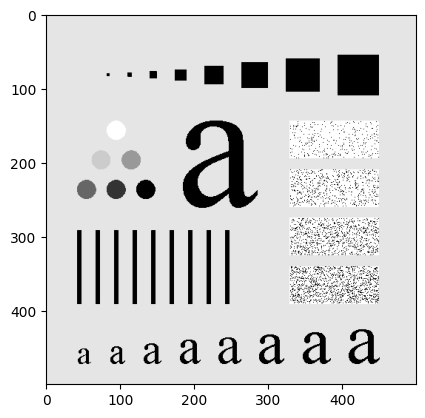

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img

image = img.imread("img/test-pattern.tif")
plt.imshow(image, cmap='gray', vmin=0, vmax=255)
plt.show()

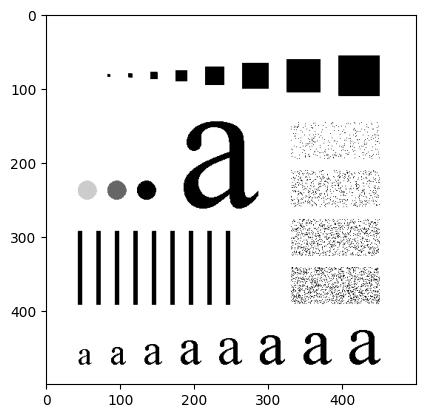

In [6]:
# Apply identity kernel
m = 5
kernel = np.zeros((m, m))
kernel[1,1]  = 2
 
filtered = cv2.filter2D(src=image, ddepth=-1, kernel=kernel)

plt.imshow(filtered, cmap='gray', vmin=0, vmax=255)
plt.show()

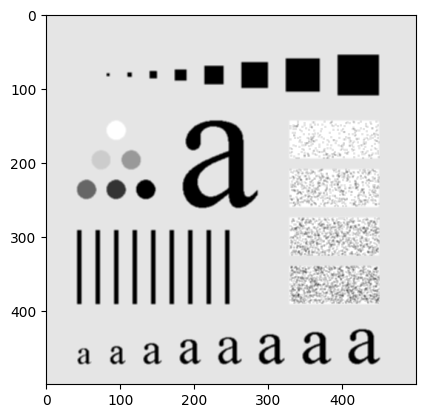

In [7]:
# Apply box kernel
m = 3
kernel = np.ones((m, m)) / (m * m)
 
filtered = cv2.filter2D(src=image, ddepth=-1, kernel=kernel)

plt.imshow(filtered, cmap='gray', vmin=0, vmax=255)
plt.show()

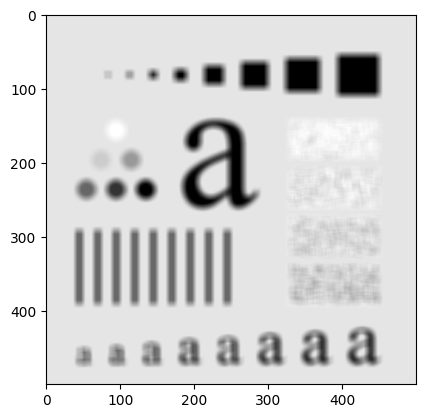

In [8]:
# Apply box kernel
m = 11
kernel = np.ones((m, m)) / (m * m)
 
filtered = cv2.filter2D(src=image, ddepth=-1, kernel=kernel)

plt.imshow(filtered, cmap='gray', vmin=0, vmax=255)
plt.show()

The kernels above are normalised. Failure to normalise would introduce bias in the pixel intensity.

### C.2 Gaussian Kernel
For the Gaussian kernel

$$w(s,t)=Ke^{-\frac{s^2+t^2}{2\sigma^2}}$$

Let $K=\sigma=1$. Then

$$w(s,t)=e^{-\frac{s^2+t^2}{2}}$$

If $m=n=3$ we determine the distance from each pixel to the centre of the kernel.

In [9]:
m = 3
dist = np.zeros((m, m))
for i in range(m):
    for j in range(m):
        dist[i,j] = np.sqrt((i - m // 2) ** 2 + (j - m // 2) ** 2)

In [10]:
dist

array([[1.41421356, 1.        , 1.41421356],
       [1.        , 0.        , 1.        ],
       [1.41421356, 1.        , 1.41421356]])

In [11]:
# Compute Gaussian kernel
kernel = np.exp(-dist ** 2 / 2)

kernel /= np.sum(kernel)
kernel

array([[0.07511361, 0.1238414 , 0.07511361],
       [0.1238414 , 0.20417996, 0.1238414 ],
       [0.07511361, 0.1238414 , 0.07511361]])

In [12]:
# with opencv
gaussian_kernel = cv2.getGaussianKernel(m, 1)

gaussian_kernel

array([[0.27406862],
       [0.45186276],
       [0.27406862]])

In [13]:
gaussian_kernel_2d = np.outer(gaussian_kernel, gaussian_kernel)
gaussian_kernel_2d

array([[0.07511361, 0.1238414 , 0.07511361],
       [0.1238414 , 0.20417996, 0.1238414 ],
       [0.07511361, 0.1238414 , 0.07511361]])

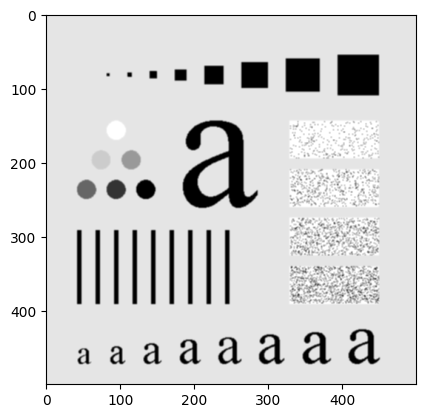

In [14]:
# Apply Gaussian kernel

image = img.imread("img/test-pattern.tif")
filtered = cv2.filter2D(src=image, ddepth=-1, kernel=kernel)

plt.imshow(filtered, cmap='gray', vmin=0, vmax=255)
plt.show()

## D. Highpass (sharpening) filters
These filters magnify transitions and are implemented using derivatives. In discrete sigals, we implement derivatives as finite diferences.

We have

\begin{equation}
\frac{\partial f}{\partial x} = f(x+1) - f(x)
\end{equation}

\begin{equation}
\frac{\partial^2 f}{\partial x^2} = f(x+1) + f(x-1) - 2f(x)
\end{equation}

For a function of several variables, we use the Laplacian operator

\begin{equation}
\nabla^2f=\frac{\partial^2 f}{\partial x^2}+\frac{\partial^2 f}{\partial y^2}
\end{equation}

For the image we get

\begin{equation}
\nabla^2f(x,y)=f(x+1,y) + f(x-1,y) + f(x,y+1) + f(x,y-1) - 4f(x,y)
\end{equation}

### D.1 Using the Laplacian Operator
Let's see an example where we filter an image using the Laplacian

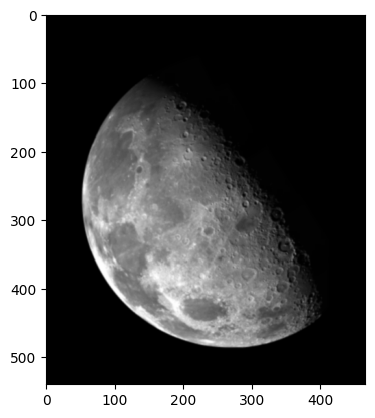

In [15]:
# example
image = img.imread("img/blurry-moon.tif").astype(np.float32)
plt.imshow(image, cmap='gray', vmin=0, vmax=255)
plt.show()

[[ 0.  1.  0.]
 [ 1. -4.  1.]
 [ 0.  1.  0.]]


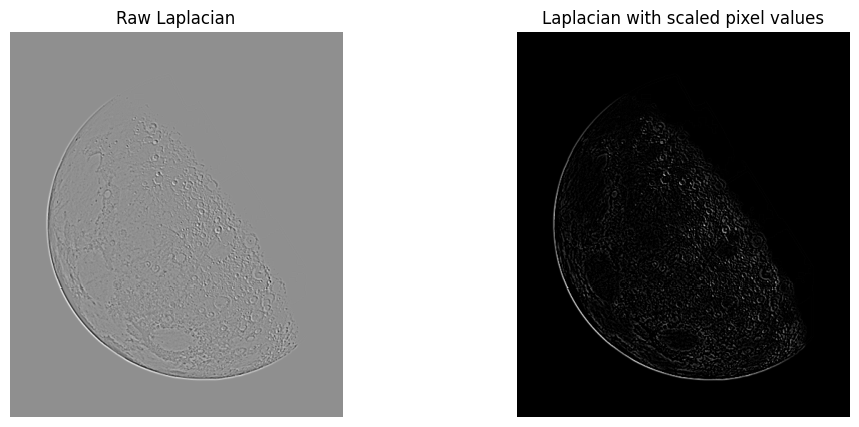

In [16]:
# Apply Laplacian kernel
m = 3
kernel = np.zeros((m, m))
kernel[1,1] = -4
kernel[0,1] = 1
kernel[1,0] = 1
kernel[1,2] = 1
kernel[2,1] = 1
print(kernel)

filtered = cv2.filter2D(src=image, ddepth=-1, kernel=kernel)
# the above filtered image has negative values. 
# So we scale the values to between 0 and 255 for display
clipped = np.clip(filtered, 0, 255).astype(np.uint8)

plt.figure(figsize=(12, 5))
plt.subplot(121), plt.axis('off'), plt.title('Raw Laplacian'), plt.imshow(filtered, cmap='gray')
plt.subplot(122), plt.axis('off'), plt.title('Laplacian with scaled pixel values'), plt.imshow(clipped, cmap='gray')
plt.show()

We can use the Laplacian to generate a sharpened image

\begin{equation}
    g(x,y) = f(x,y) + c[\nabla^2f(x,y)]
\end{equation}

where $c$ is -1 when the centre coefficient of the kernel is negative.

Clearly, the detail in the resulting image in this image is unmistakably clearer and sharper than 
in the original imag.e

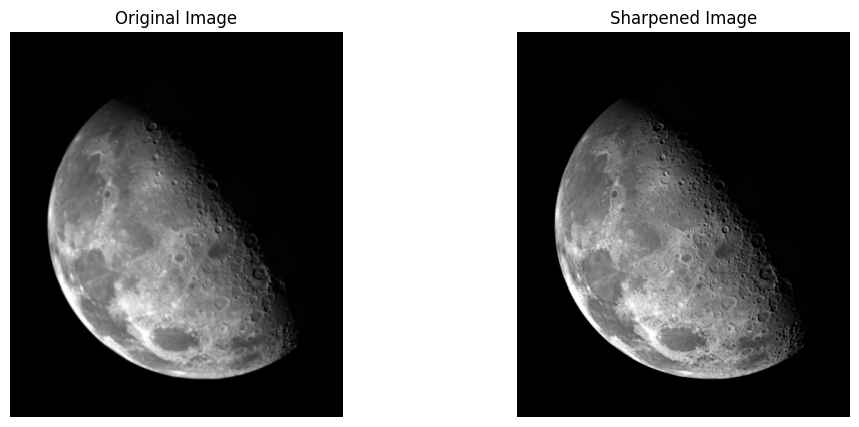

In [17]:
# sharpened image
c = -1
sharpened_image = np.clip(image - clipped, a_min=0, a_max=None)

plt.figure(figsize=(12, 5))
plt.subplot(121), plt.axis('off'), plt.title('Original Image'), plt.imshow(image, cmap='gray')
plt.subplot(122), plt.axis('off'), plt.title('Sharpened Image'), plt.imshow(sharpened_image, cmap='gray')
plt.show()

### D.2 Using Sobel Operators (A First-Order Derivative Operator) 

First derivatives in image processing are implement usnig the magnitude of the gradient. The gradient of an image $f$ at coordinates $(x, y)$ is defined as the two-dimensional column vector:

\begin{equation} 
    \nabla f = grad(f) = \begin{bmatrix} 
            g_x \\ g_y 
        \end{bmatrix} = \begin{bmatrix} 
            \frac{\partial f}{\partial x} \\ 
            \frac{\partial f}{\partial y} 
        \end{bmatrix} 
\end{equation}

The magnitude, $M(x,y)$ or $\| \nabla f\|$, of this vector is calculated as

\begin{equation}
    M(x,y) = \| \nabla f\| = mag(\nabla f) = \sqrt{g_x^2 + g_y^2}
\end{equation}

or

\begin{equation}
    M(x,y) = |g_x| + |g_y|
\end{equation}

The equations for computing $g_x$ and $g_y$ for *Sobel* operators are:

\begin{align}
    g_x &= \frac{\partial f}{\partial x} = (f(x+1,y-1) + 2f(x+1,y) + f(x+1,y+1)) - (f(x-1,y-1) + 2f(x-1,y) + f(x-1,y+1)) \\[10pt]
    g_y &= \frac{\partial f}{\partial y} = (f(x-1,y+1) + 2f(x,y+1) + f(x+1,y+1)) - (f(x-1,y-1) + 2f(x,y-1) + f(x+1,y-1))
\end{align}

Here is how they look like:

\begin{align}
    g_x &= 
    \begin{bmatrix}
        -1 & -2 & -1 \\
        0 & 0 & 0 \\
        1 & 2 & 1
    \end{bmatrix} \\[10pt]
    g_y &= 
    \begin{bmatrix}
        -1 & 0 & 1 \\
        -2 & 0 & 2 \\
        -1 & 0 & 1
    \end{bmatrix}
\end{align}

Now let's apply the *Sobel* oprator on an image and see the results.

In [18]:
sobel_gx = np.zeros((m, m))
sobel_gx[0, :] = [-1, -2, -1]
sobel_gx[2, :] = [1, 2, 1]

sobel_gy = np.zeros((m, m))
sobel_gy[:, 0] = [-1, -2, -1]
sobel_gy[:, 2] = [1, 2, 1]

sobel_gx, sobel_gy

(array([[-1., -2., -1.],
        [ 0.,  0.,  0.],
        [ 1.,  2.,  1.]]),
 array([[-1.,  0.,  1.],
        [-2.,  0.,  2.],
        [-1.,  0.,  1.]]))

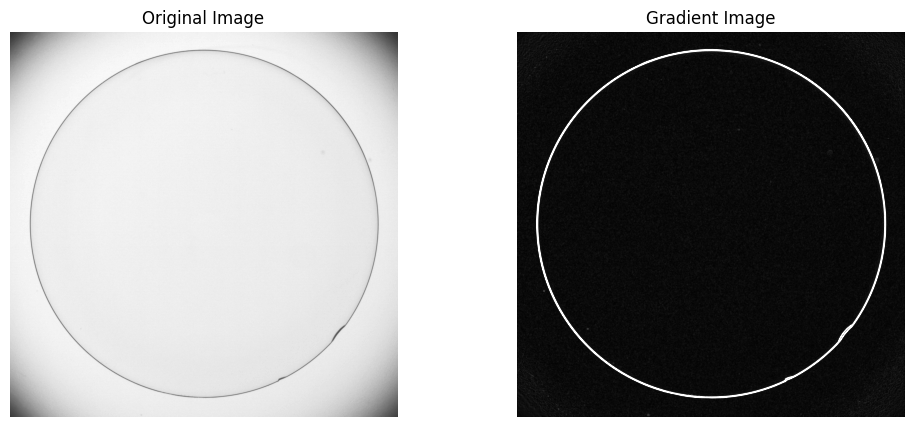

In [19]:
image = img.imread("img/contact_lens_original.tif").astype(np.float32)
filtered_x = cv2.filter2D(src=image, ddepth=-1, kernel=sobel_gx)
filtered_y = cv2.filter2D(src=image, ddepth=-1, kernel=sobel_gy)
filtered = np.sqrt(filtered_x ** 2 + filtered_y ** 2)

plt.figure(figsize=(12, 5))
plt.subplot(121), plt.axis('off'), plt.title('Original Image'), plt.imshow(image, cmap='gray', vmin=0, vmax=255)
plt.subplot(122), plt.axis('off'), plt.title('Gradient Image'), plt.imshow(filtered, cmap='gray', vmin=0, vmax=255)
plt.show()